## 예제 : 베스트 모델 만들기
### 와인의 종류 예측하기

In [1]:
import pandas as pd

# 전체 값 중 샘플 뽑기 (frac=1 == 100%) => 순서가 랜덤
wine_df = pd.read_csv('../dataset/wine.csv', header=None).sample(frac=1)
wine_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
4655,6.9,0.28,0.41,1.4,0.016,6.0,55.0,0.98876,3.16,0.40,13.4,5,0
6103,6.5,0.32,0.23,8.5,0.051,20.0,138.0,0.99430,3.03,0.42,10.7,5,0
4398,6.7,0.16,0.37,1.3,0.036,45.0,125.0,0.98964,3.19,0.51,12.4,7,0
499,8.7,0.69,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6,1
6098,5.2,0.38,0.26,7.7,0.053,20.0,103.0,0.99250,3.27,0.45,12.2,6,0


In [2]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 4655 to 6316
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [3]:
wine_dataset = wine_df.values
X = wine_dataset[:,0:12]
Y = wine_dataset[:,12]

### 모델 설계 & 실행

In [4]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [5]:
model.fit(X, Y, epochs=200, batch_size=200)

Epoch 1/200
6497/6497 [==============================] - 1s 180us/step - loss: 0.4326 - accuracy: 0.7868
Epoch 2/200
6497/6497 [==============================] - 0s 34us/step - loss: 0.2745 - accuracy: 0.9052
Epoch 3/200
6497/6497 [==============================] - 0s 31us/step - loss: 0.2187 - accuracy: 0.9266
Epoch 4/200
6497/6497 [==============================] - 0s 16us/step - loss: 0.2073 - accuracy: 0.9278
Epoch 5/200
6497/6497 [==============================] - 0s 15us/step - loss: 0.1984 - accuracy: 0.9306
Epoch 6/200
6497/6497 [==============================] - 0s 15us/step - loss: 0.1913 - accuracy: 0.9326
Epoch 7/200
6497/6497 [==============================] - 0s 15us/step - loss: 0.1875 - accuracy: 0.9347
Epoch 8/200
6497/6497 [==============================] - 0s 18us/step - loss: 0.1830 - accuracy: 0.9367
Epoch 9/200
6497/6497 [==============================] - 0s 14us/step - loss: 0.1814 - accuracy: 0.9378
Epoch 10/200
6497/6497 [==============================] - 0s 15

6497/6497 [==============================] - 0s 13us/step - loss: 0.0628 - accuracy: 0.9808
Epoch 80/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.0560 - accuracy: 0.9843
Epoch 81/200
6497/6497 [==============================] - 0s 14us/step - loss: 0.0565 - accuracy: 0.9837
Epoch 82/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.0558 - accuracy: 0.9841
Epoch 83/200
6497/6497 [==============================] - 0s 14us/step - loss: 0.0576 - accuracy: 0.9843
Epoch 84/200
6497/6497 [==============================] - 0s 14us/step - loss: 0.0579 - accuracy: 0.9826
Epoch 85/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.0569 - accuracy: 0.9841
Epoch 86/200
6497/6497 [==============================] - 0s 14us/step - loss: 0.0573 - accuracy: 0.9840
Epoch 87/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.0659 - accuracy: 0.9798
Epoch 88/200
6497/6497 [==============================] - 0s 13us/st

In [6]:
print("Accuracy: {}".format(model.evaluate(X, Y)[1]))

6497/6497 [==============================] - 0s 44us/step
Accuracy: 0.9884561896324158


#### 여러 모델 저장해 비교해보기

In [7]:
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = ''.join([MODEL_DIR, "{epoch:02d}-{val_loss:.4f}.hdf5"])

In [8]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [9]:
del model

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.26113, saving model to ./model/01-0.2611.hdf5

Epoch 00002: val_loss improved from 0.26113 to 0.21556, saving model to ./model/02-0.2156.hdf5

Epoch 00003: val_loss improved from 0.21556 to 0.20116, saving model to ./model/03-0.2012.hdf5

Epoch 00004: val_loss improved from 0.20116 to 0.19232, saving model to ./model/04-0.1923.hdf5

Epoch 00005: val_loss improved from 0.19232 to 0.18469, saving model to ./model/05-0.1847.hdf5

Epoch 00006: val_loss improved from 0.18469 to 0.17815, saving model to ./model/06-0.1781.hdf5

Epoch 00007: val_loss improved from 0.17815 to 0.17412, saving model to ./model/07-0.1741.hdf5

Epoch 00008: val_loss improved from 0.17412 to 0.16907, saving model to ./model/08-0.1691.hdf5

Epoch 00009: val_loss improved from 0.16907 to 0.16373, saving model to ./model/09-0.1637.hdf5

Epoch 00010: val_loss improved from 0.16373 to 0.16237, saving model to ./model/10-0.1624.hdf5

Epoch 00011: val_loss improved from 0.16237


Epoch 00107: val_loss did not improve from 0.03634

Epoch 00108: val_loss did not improve from 0.03634

Epoch 00109: val_loss did not improve from 0.03634

Epoch 00110: val_loss improved from 0.03634 to 0.03604, saving model to ./model/110-0.0360.hdf5

Epoch 00111: val_loss did not improve from 0.03604

Epoch 00112: val_loss did not improve from 0.03604

Epoch 00113: val_loss did not improve from 0.03604

Epoch 00114: val_loss did not improve from 0.03604

Epoch 00115: val_loss improved from 0.03604 to 0.03541, saving model to ./model/115-0.0354.hdf5

Epoch 00116: val_loss did not improve from 0.03541

Epoch 00117: val_loss did not improve from 0.03541

Epoch 00118: val_loss did not improve from 0.03541

Epoch 00119: val_loss did not improve from 0.03541

Epoch 00120: val_loss did not improve from 0.03541

Epoch 00121: val_loss did not improve from 0.03541

Epoch 00122: val_loss did not improve from 0.03541

Epoch 00123: val_loss did not improve from 0.03541

Epoch 00124: val_loss did

#### 그래프로 확인해보기

In [10]:
wine_new_df = wine_df.sample(frac=0.15)

wine_new_dataset = wine_new_df.values
X = wine_new_dataset[:,0:12]
Y = wine_new_dataset[:,12]

del model

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

Train on 653 samples, validate on 322 samples
Epoch 1/3500
653/653 [==============================] - 1s 2ms/step - loss: 3.1995 - accuracy: 0.3216 - val_loss: 2.0184 - val_accuracy: 0.3789
Epoch 2/3500
653/653 [==============================] - 0s 17us/step - loss: 1.8952 - accuracy: 0.4288 - val_loss: 1.1032 - val_accuracy: 0.4969
Epoch 3/3500
653/653 [==============================] - 0s 16us/step - loss: 1.0041 - accuracy: 0.5789 - val_loss: 0.7161 - val_accuracy: 0.7081
Epoch 4/3500
653/653 [==============================] - 0s 16us/step - loss: 0.6289 - accuracy: 0.7412 - val_loss: 0.6226 - val_accuracy: 0.7484
Epoch 5/3500
653/653 [==============================] - 0s 18us/step - loss: 0.5121 - accuracy: 0.7825 - val_loss: 0.6346 - val_accuracy: 0.7547
Epoch 6/3500
653/653 [==============================] - 0s 17us/step - loss: 0.5014 - accuracy: 0.7688 - val_loss: 0.6685 - val_accuracy: 0.7484
Epoch 7/3500
653/653 [==============================] - 0s 15us/step - loss: 0.5213 -

Epoch 57/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1947 - accuracy: 0.9342 - val_loss: 0.2671 - val_accuracy: 0.9379
Epoch 58/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1936 - accuracy: 0.9357 - val_loss: 0.2663 - val_accuracy: 0.9379
Epoch 59/3500
653/653 [==============================] - 0s 17us/step - loss: 0.1924 - accuracy: 0.9372 - val_loss: 0.2658 - val_accuracy: 0.9379
Epoch 60/3500
653/653 [==============================] - 0s 17us/step - loss: 0.1917 - accuracy: 0.9403 - val_loss: 0.2658 - val_accuracy: 0.9379
Epoch 61/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1914 - accuracy: 0.9372 - val_loss: 0.2657 - val_accuracy: 0.9379
Epoch 62/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1913 - accuracy: 0.9387 - val_loss: 0.2647 - val_accuracy: 0.9379
Epoch 63/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1900 - accuracy: 0.9403 - val_loss: 0.2630 -

653/653 [==============================] - 0s 15us/step - loss: 0.1672 - accuracy: 0.9449 - val_loss: 0.2465 - val_accuracy: 0.9472
Epoch 114/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1671 - accuracy: 0.9418 - val_loss: 0.2461 - val_accuracy: 0.9472
Epoch 115/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1668 - accuracy: 0.9403 - val_loss: 0.2461 - val_accuracy: 0.9472
Epoch 116/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1664 - accuracy: 0.9418 - val_loss: 0.2463 - val_accuracy: 0.9472
Epoch 117/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1662 - accuracy: 0.9464 - val_loss: 0.2465 - val_accuracy: 0.9472
Epoch 118/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1661 - accuracy: 0.9464 - val_loss: 0.2466 - val_accuracy: 0.9472
Epoch 119/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1659 - accuracy: 0.9464 - val_loss: 0.2473 - val_acc

Epoch 169/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1538 - accuracy: 0.9479 - val_loss: 0.2328 - val_accuracy: 0.9472
Epoch 170/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1535 - accuracy: 0.9510 - val_loss: 0.2319 - val_accuracy: 0.9472
Epoch 171/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1532 - accuracy: 0.9525 - val_loss: 0.2309 - val_accuracy: 0.9472
Epoch 172/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1533 - accuracy: 0.9464 - val_loss: 0.2301 - val_accuracy: 0.9472
Epoch 173/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1535 - accuracy: 0.9464 - val_loss: 0.2297 - val_accuracy: 0.9472
Epoch 174/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1527 - accuracy: 0.9464 - val_loss: 0.2303 - val_accuracy: 0.9472
Epoch 175/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1520 - accuracy: 0.9510 - val_loss: 0

Epoch 225/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1406 - accuracy: 0.9602 - val_loss: 0.2138 - val_accuracy: 0.9472
Epoch 226/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1405 - accuracy: 0.9602 - val_loss: 0.2129 - val_accuracy: 0.9472
Epoch 227/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1403 - accuracy: 0.9602 - val_loss: 0.2114 - val_accuracy: 0.9534
Epoch 228/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1399 - accuracy: 0.9587 - val_loss: 0.2108 - val_accuracy: 0.9534
Epoch 229/3500
653/653 [==============================] - 0s 18us/step - loss: 0.1399 - accuracy: 0.9571 - val_loss: 0.2112 - val_accuracy: 0.9534
Epoch 230/3500
653/653 [==============================] - 0s 17us/step - loss: 0.1394 - accuracy: 0.9602 - val_loss: 0.2132 - val_accuracy: 0.9472
Epoch 231/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1396 - accuracy: 0.9602 - val_loss: 0

Epoch 281/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1263 - accuracy: 0.9617 - val_loss: 0.1895 - val_accuracy: 0.9534
Epoch 282/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1262 - accuracy: 0.9617 - val_loss: 0.1886 - val_accuracy: 0.9534
Epoch 283/3500
653/653 [==============================] - 0s 19us/step - loss: 0.1259 - accuracy: 0.9617 - val_loss: 0.1887 - val_accuracy: 0.9534
Epoch 284/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1256 - accuracy: 0.9617 - val_loss: 0.1891 - val_accuracy: 0.9534
Epoch 285/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1253 - accuracy: 0.9617 - val_loss: 0.1905 - val_accuracy: 0.9534
Epoch 286/3500
653/653 [==============================] - 0s 14us/step - loss: 0.1252 - accuracy: 0.9602 - val_loss: 0.1919 - val_accuracy: 0.9534
Epoch 287/3500
653/653 [==============================] - 0s 15us/step - loss: 0.1252 - accuracy: 0.9587 - val_loss: 0

Epoch 337/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1123 - accuracy: 0.9632 - val_loss: 0.1641 - val_accuracy: 0.9565
Epoch 338/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1110 - accuracy: 0.9648 - val_loss: 0.1717 - val_accuracy: 0.9565
Epoch 339/3500
653/653 [==============================] - 0s 18us/step - loss: 0.1123 - accuracy: 0.9632 - val_loss: 0.1736 - val_accuracy: 0.9565
Epoch 340/3500
653/653 [==============================] - 0s 21us/step - loss: 0.1122 - accuracy: 0.9632 - val_loss: 0.1682 - val_accuracy: 0.9565
Epoch 341/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1107 - accuracy: 0.9648 - val_loss: 0.1633 - val_accuracy: 0.9565
Epoch 342/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1110 - accuracy: 0.9663 - val_loss: 0.1616 - val_accuracy: 0.9565
Epoch 343/3500
653/653 [==============================] - 0s 16us/step - loss: 0.1106 - accuracy: 0.9648 - val_loss: 0

Epoch 393/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0987 - accuracy: 0.9663 - val_loss: 0.1469 - val_accuracy: 0.9596
Epoch 394/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0980 - accuracy: 0.9678 - val_loss: 0.1418 - val_accuracy: 0.9596
Epoch 395/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0979 - accuracy: 0.9678 - val_loss: 0.1401 - val_accuracy: 0.9627
Epoch 396/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0978 - accuracy: 0.9678 - val_loss: 0.1397 - val_accuracy: 0.9627
Epoch 397/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0975 - accuracy: 0.9678 - val_loss: 0.1427 - val_accuracy: 0.9596
Epoch 398/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0972 - accuracy: 0.9678 - val_loss: 0.1465 - val_accuracy: 0.9565
Epoch 399/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0977 - accuracy: 0.9678 - val_loss: 0

Epoch 449/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0907 - accuracy: 0.9694 - val_loss: 0.1384 - val_accuracy: 0.9658
Epoch 450/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0880 - accuracy: 0.9740 - val_loss: 0.1336 - val_accuracy: 0.9658
Epoch 451/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0872 - accuracy: 0.9724 - val_loss: 0.1307 - val_accuracy: 0.9752
Epoch 452/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0875 - accuracy: 0.9694 - val_loss: 0.1312 - val_accuracy: 0.9752
Epoch 453/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0873 - accuracy: 0.9709 - val_loss: 0.1351 - val_accuracy: 0.9658
Epoch 454/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0877 - accuracy: 0.9740 - val_loss: 0.1332 - val_accuracy: 0.9658
Epoch 455/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0873 - accuracy: 0.9709 - val_loss: 0

Epoch 505/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0804 - accuracy: 0.9755 - val_loss: 0.1199 - val_accuracy: 0.9783
Epoch 506/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0828 - accuracy: 0.9724 - val_loss: 0.1189 - val_accuracy: 0.9783
Epoch 507/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0822 - accuracy: 0.9709 - val_loss: 0.1272 - val_accuracy: 0.9752
Epoch 508/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0805 - accuracy: 0.9770 - val_loss: 0.1410 - val_accuracy: 0.9658
Epoch 509/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0840 - accuracy: 0.9740 - val_loss: 0.1387 - val_accuracy: 0.9658
Epoch 510/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0824 - accuracy: 0.9740 - val_loss: 0.1251 - val_accuracy: 0.9752
Epoch 511/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0807 - accuracy: 0.9755 - val_loss: 0

Epoch 561/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0772 - accuracy: 0.9740 - val_loss: 0.1217 - val_accuracy: 0.9752
Epoch 562/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0747 - accuracy: 0.9770 - val_loss: 0.1267 - val_accuracy: 0.9752
Epoch 563/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0756 - accuracy: 0.9770 - val_loss: 0.1272 - val_accuracy: 0.9752
Epoch 564/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0754 - accuracy: 0.9770 - val_loss: 0.1208 - val_accuracy: 0.9752
Epoch 565/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0746 - accuracy: 0.9770 - val_loss: 0.1174 - val_accuracy: 0.9752
Epoch 566/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0753 - accuracy: 0.9786 - val_loss: 0.1176 - val_accuracy: 0.9752
Epoch 567/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0748 - accuracy: 0.9786 - val_loss: 0

Epoch 617/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0700 - accuracy: 0.9770 - val_loss: 0.1164 - val_accuracy: 0.9752
Epoch 618/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0701 - accuracy: 0.9770 - val_loss: 0.1174 - val_accuracy: 0.9752
Epoch 619/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0698 - accuracy: 0.9770 - val_loss: 0.1195 - val_accuracy: 0.9752
Epoch 620/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0697 - accuracy: 0.9770 - val_loss: 0.1204 - val_accuracy: 0.9752
Epoch 621/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0699 - accuracy: 0.9786 - val_loss: 0.1203 - val_accuracy: 0.9752
Epoch 622/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0696 - accuracy: 0.9770 - val_loss: 0.1219 - val_accuracy: 0.9752
Epoch 623/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0696 - accuracy: 0.9770 - val_loss: 0

Epoch 673/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0671 - accuracy: 0.9786 - val_loss: 0.1273 - val_accuracy: 0.9752
Epoch 674/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0683 - accuracy: 0.9770 - val_loss: 0.1171 - val_accuracy: 0.9752
Epoch 675/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0658 - accuracy: 0.9816 - val_loss: 0.1087 - val_accuracy: 0.9783
Epoch 676/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0684 - accuracy: 0.9770 - val_loss: 0.1102 - val_accuracy: 0.9752
Epoch 677/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0665 - accuracy: 0.9801 - val_loss: 0.1223 - val_accuracy: 0.9752
Epoch 678/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0674 - accuracy: 0.9786 - val_loss: 0.1226 - val_accuracy: 0.9752
Epoch 679/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0666 - accuracy: 0.9786 - val_loss: 0

Epoch 729/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0617 - accuracy: 0.9786 - val_loss: 0.1158 - val_accuracy: 0.9752
Epoch 730/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0621 - accuracy: 0.9786 - val_loss: 0.1118 - val_accuracy: 0.9752
Epoch 731/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0614 - accuracy: 0.9801 - val_loss: 0.1062 - val_accuracy: 0.9814
Epoch 732/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0640 - accuracy: 0.9816 - val_loss: 0.1091 - val_accuracy: 0.9752
Epoch 733/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0617 - accuracy: 0.9786 - val_loss: 0.1191 - val_accuracy: 0.9752
Epoch 734/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0623 - accuracy: 0.9786 - val_loss: 0.1224 - val_accuracy: 0.9752
Epoch 735/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0627 - accuracy: 0.9786 - val_loss: 0

Epoch 785/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0610 - accuracy: 0.9770 - val_loss: 0.1186 - val_accuracy: 0.9752
Epoch 786/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0598 - accuracy: 0.9786 - val_loss: 0.1077 - val_accuracy: 0.9752
Epoch 787/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0582 - accuracy: 0.9801 - val_loss: 0.1082 - val_accuracy: 0.9752
Epoch 788/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0581 - accuracy: 0.9786 - val_loss: 0.1111 - val_accuracy: 0.9752
Epoch 789/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0577 - accuracy: 0.9801 - val_loss: 0.1098 - val_accuracy: 0.9752
Epoch 790/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0576 - accuracy: 0.9801 - val_loss: 0.1091 - val_accuracy: 0.9752
Epoch 791/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0580 - accuracy: 0.9801 - val_loss: 0

Epoch 841/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0571 - accuracy: 0.9801 - val_loss: 0.1094 - val_accuracy: 0.9752
Epoch 842/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0551 - accuracy: 0.9801 - val_loss: 0.1095 - val_accuracy: 0.9752
Epoch 843/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0551 - accuracy: 0.9801 - val_loss: 0.1054 - val_accuracy: 0.9752
Epoch 844/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0555 - accuracy: 0.9786 - val_loss: 0.1029 - val_accuracy: 0.9752
Epoch 845/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0556 - accuracy: 0.9816 - val_loss: 0.1092 - val_accuracy: 0.9752
Epoch 846/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0545 - accuracy: 0.9801 - val_loss: 0.1165 - val_accuracy: 0.9752
Epoch 847/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0560 - accuracy: 0.9801 - val_loss: 0

Epoch 897/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0513 - accuracy: 0.9816 - val_loss: 0.1069 - val_accuracy: 0.9752
Epoch 898/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0512 - accuracy: 0.9816 - val_loss: 0.1092 - val_accuracy: 0.9752
Epoch 899/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0514 - accuracy: 0.9816 - val_loss: 0.1104 - val_accuracy: 0.9752
Epoch 900/3500
653/653 [==============================] - 0s 20us/step - loss: 0.0515 - accuracy: 0.9816 - val_loss: 0.1089 - val_accuracy: 0.9752
Epoch 901/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0512 - accuracy: 0.9816 - val_loss: 0.1071 - val_accuracy: 0.9752
Epoch 902/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0508 - accuracy: 0.9816 - val_loss: 0.1021 - val_accuracy: 0.9814
Epoch 903/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0526 - accuracy: 0.9816 - val_loss: 0

Epoch 953/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0484 - accuracy: 0.9862 - val_loss: 0.1189 - val_accuracy: 0.9752
Epoch 954/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0506 - accuracy: 0.9832 - val_loss: 0.1119 - val_accuracy: 0.9752
Epoch 955/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0487 - accuracy: 0.9832 - val_loss: 0.1034 - val_accuracy: 0.9783
Epoch 956/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.1032 - val_accuracy: 0.9783
Epoch 957/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0478 - accuracy: 0.9847 - val_loss: 0.1114 - val_accuracy: 0.9752
Epoch 958/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.1154 - val_accuracy: 0.9752
Epoch 959/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0488 - accuracy: 0.9832 - val_loss: 0

653/653 [==============================] - 0s 16us/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.1007 - val_accuracy: 0.9814
Epoch 1064/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0439 - accuracy: 0.9877 - val_loss: 0.1062 - val_accuracy: 0.9783
Epoch 1065/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.1165 - val_accuracy: 0.9752
Epoch 1066/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0450 - accuracy: 0.9847 - val_loss: 0.1117 - val_accuracy: 0.9752
Epoch 1067/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.1035 - val_accuracy: 0.9783
Epoch 1068/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.1024 - val_accuracy: 0.9783
Epoch 1069/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0433 - accuracy: 0.9847 - val_loss: 0.1047 - v

653/653 [==============================] - 0s 15us/step - loss: 0.0400 - accuracy: 0.9862 - val_loss: 0.1080 - val_accuracy: 0.9752
Epoch 1174/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.1080 - val_accuracy: 0.9752
Epoch 1175/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0991 - val_accuracy: 0.9845
Epoch 1176/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.1006 - val_accuracy: 0.9845
Epoch 1177/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0404 - accuracy: 0.9862 - val_loss: 0.1114 - val_accuracy: 0.9752
Epoch 1178/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0402 - accuracy: 0.9877 - val_loss: 0.1086 - val_accuracy: 0.9783
Epoch 1179/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.1038 - v

653/653 [==============================] - 0s 15us/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.1125 - val_accuracy: 0.9783
Epoch 1284/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0357 - accuracy: 0.9877 - val_loss: 0.0956 - val_accuracy: 0.9876
Epoch 1285/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0403 - accuracy: 0.9908 - val_loss: 0.0965 - val_accuracy: 0.9876
Epoch 1286/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0407 - accuracy: 0.9893 - val_loss: 0.1064 - val_accuracy: 0.9814
Epoch 1287/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0362 - accuracy: 0.9893 - val_loss: 0.1054 - val_accuracy: 0.9814
Epoch 1288/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0359 - accuracy: 0.9908 - val_loss: 0.1081 - val_accuracy: 0.9814
Epoch 1289/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.1049 - v

653/653 [==============================] - 0s 14us/step - loss: 0.0324 - accuracy: 0.9908 - val_loss: 0.1190 - val_accuracy: 0.9720
Epoch 1394/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0365 - accuracy: 0.9893 - val_loss: 0.1193 - val_accuracy: 0.9720
Epoch 1395/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0367 - accuracy: 0.9893 - val_loss: 0.0992 - val_accuracy: 0.9845
Epoch 1396/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0341 - accuracy: 0.9923 - val_loss: 0.1022 - val_accuracy: 0.9814
Epoch 1397/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0327 - accuracy: 0.9923 - val_loss: 0.1187 - val_accuracy: 0.9720
Epoch 1398/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0371 - accuracy: 0.9893 - val_loss: 0.1065 - val_accuracy: 0.9783
Epoch 1399/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0951 - v

653/653 [==============================] - 0s 16us/step - loss: 0.0334 - accuracy: 0.9908 - val_loss: 0.1097 - val_accuracy: 0.9783
Epoch 1504/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0311 - accuracy: 0.9893 - val_loss: 0.1110 - val_accuracy: 0.9783
Epoch 1505/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0995 - val_accuracy: 0.9845
Epoch 1506/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0318 - accuracy: 0.9923 - val_loss: 0.0991 - val_accuracy: 0.9876
Epoch 1507/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0319 - accuracy: 0.9908 - val_loss: 0.1070 - val_accuracy: 0.9814
Epoch 1508/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0302 - accuracy: 0.9893 - val_loss: 0.1021 - val_accuracy: 0.9845
Epoch 1509/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.1000 - v

653/653 [==============================] - 0s 74us/step - loss: 0.0284 - accuracy: 0.9923 - val_loss: 0.0969 - val_accuracy: 0.9876
Epoch 1614/3500
653/653 [==============================] - 0s 124us/step - loss: 0.0302 - accuracy: 0.9923 - val_loss: 0.1093 - val_accuracy: 0.9783
Epoch 1615/3500
653/653 [==============================] - 0s 48us/step - loss: 0.0274 - accuracy: 0.9893 - val_loss: 0.1169 - val_accuracy: 0.9752
Epoch 1616/3500
653/653 [==============================] - 0s 69us/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.1114 - val_accuracy: 0.9783
Epoch 1617/3500
653/653 [==============================] - 0s 55us/step - loss: 0.0275 - accuracy: 0.9893 - val_loss: 0.1023 - val_accuracy: 0.9845
Epoch 1618/3500
653/653 [==============================] - 0s 37us/step - loss: 0.0279 - accuracy: 0.9923 - val_loss: 0.0990 - val_accuracy: 0.9876
Epoch 1619/3500
653/653 [==============================] - 0s 41us/step - loss: 0.0280 - accuracy: 0.9923 - val_loss: 0.1098 - 

653/653 [==============================] - 0s 18us/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.1044 - val_accuracy: 0.9845
Epoch 1724/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0250 - accuracy: 0.9908 - val_loss: 0.1128 - val_accuracy: 0.9783
Epoch 1725/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0276 - accuracy: 0.9908 - val_loss: 0.1057 - val_accuracy: 0.9814
Epoch 1726/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.0965 - val_accuracy: 0.9876
Epoch 1727/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.1164 - val_accuracy: 0.9752
Epoch 1728/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.1339 - val_accuracy: 0.9720
Epoch 1729/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.1198 - v

653/653 [==============================] - 0s 16us/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0976 - val_accuracy: 0.9876
Epoch 1834/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.1035 - val_accuracy: 0.9845
Epoch 1835/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.1283 - val_accuracy: 0.9752
Epoch 1836/3500
653/653 [==============================] - 0s 20us/step - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.1239 - val_accuracy: 0.9752
Epoch 1837/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.1001 - val_accuracy: 0.9845
Epoch 1838/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0270 - accuracy: 0.9923 - val_loss: 0.0994 - val_accuracy: 0.9876
Epoch 1839/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0264 - accuracy: 0.9923 - val_loss: 0.1191 - v

653/653 [==============================] - 0s 18us/step - loss: 0.0231 - accuracy: 0.9908 - val_loss: 0.1074 - val_accuracy: 0.9814
Epoch 1944/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0225 - accuracy: 0.9923 - val_loss: 0.1162 - val_accuracy: 0.9814
Epoch 1945/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0233 - accuracy: 0.9954 - val_loss: 0.1205 - val_accuracy: 0.9752
Epoch 1946/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.1070 - val_accuracy: 0.9845
Epoch 1947/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0266 - accuracy: 0.9893 - val_loss: 0.1121 - val_accuracy: 0.9814
Epoch 1948/3500
653/653 [==============================] - 0s 20us/step - loss: 0.0266 - accuracy: 0.9939 - val_loss: 0.1310 - val_accuracy: 0.9752
Epoch 1949/3500
653/653 [==============================] - 0s 20us/step - loss: 0.0264 - accuracy: 0.9923 - val_loss: 0.1068 - v

653/653 [==============================] - 0s 15us/step - loss: 0.0216 - accuracy: 0.9939 - val_loss: 0.1094 - val_accuracy: 0.9845
Epoch 2054/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0221 - accuracy: 0.9908 - val_loss: 0.1117 - val_accuracy: 0.9845
Epoch 2055/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0216 - accuracy: 0.9939 - val_loss: 0.1222 - val_accuracy: 0.9783
Epoch 2056/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.1190 - val_accuracy: 0.9814
Epoch 2057/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0221 - accuracy: 0.9939 - val_loss: 0.1096 - val_accuracy: 0.9845
Epoch 2058/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0226 - accuracy: 0.9908 - val_loss: 0.1108 - val_accuracy: 0.9845
Epoch 2059/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0220 - accuracy: 0.9923 - val_loss: 0.1184 - v

653/653 [==============================] - 0s 15us/step - loss: 0.0214 - accuracy: 0.9954 - val_loss: 0.1231 - val_accuracy: 0.9783
Epoch 2164/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0211 - accuracy: 0.9939 - val_loss: 0.1092 - val_accuracy: 0.9845
Epoch 2165/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0214 - accuracy: 0.9923 - val_loss: 0.1048 - val_accuracy: 0.9845
Epoch 2166/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0237 - accuracy: 0.9908 - val_loss: 0.1118 - val_accuracy: 0.9814
Epoch 2167/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0209 - accuracy: 0.9923 - val_loss: 0.1231 - val_accuracy: 0.9783
Epoch 2168/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0215 - accuracy: 0.9939 - val_loss: 0.1241 - val_accuracy: 0.9783
Epoch 2169/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0220 - accuracy: 0.9923 - val_loss: 0.1169 - v

653/653 [==============================] - 0s 17us/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.1427 - val_accuracy: 0.9752
Epoch 2274/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0252 - accuracy: 0.9908 - val_loss: 0.1152 - val_accuracy: 0.9845
Epoch 2275/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0202 - accuracy: 0.9923 - val_loss: 0.1088 - val_accuracy: 0.9845
Epoch 2276/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0220 - accuracy: 0.9908 - val_loss: 0.1222 - val_accuracy: 0.9814
Epoch 2277/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0209 - accuracy: 0.9939 - val_loss: 0.1456 - val_accuracy: 0.9720
Epoch 2278/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0262 - accuracy: 0.9908 - val_loss: 0.1208 - val_accuracy: 0.9845
Epoch 2279/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0234 - accuracy: 0.9939 - val_loss: 0.1060 - v

653/653 [==============================] - 0s 19us/step - loss: 0.0205 - accuracy: 0.9923 - val_loss: 0.1105 - val_accuracy: 0.9845
Epoch 2384/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0204 - accuracy: 0.9939 - val_loss: 0.1306 - val_accuracy: 0.9783
Epoch 2385/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0220 - accuracy: 0.9939 - val_loss: 0.1453 - val_accuracy: 0.9783
Epoch 2386/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0244 - accuracy: 0.9908 - val_loss: 0.1164 - val_accuracy: 0.9814
Epoch 2387/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0191 - accuracy: 0.9923 - val_loss: 0.1049 - val_accuracy: 0.9845
Epoch 2388/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0239 - accuracy: 0.9893 - val_loss: 0.1218 - val_accuracy: 0.9814
Epoch 2389/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0211 - accuracy: 0.9954 - val_loss: 0.1459 - v

653/653 [==============================] - 0s 23us/step - loss: 0.0218 - accuracy: 0.9908 - val_loss: 0.1151 - val_accuracy: 0.9845
Epoch 2494/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.1333 - val_accuracy: 0.9814
Epoch 2495/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0215 - accuracy: 0.9954 - val_loss: 0.1208 - val_accuracy: 0.9845
Epoch 2496/3500
653/653 [==============================] - 0s 23us/step - loss: 0.0196 - accuracy: 0.9923 - val_loss: 0.1094 - val_accuracy: 0.9845
Epoch 2497/3500
653/653 [==============================] - 0s 31us/step - loss: 0.0244 - accuracy: 0.9908 - val_loss: 0.1321 - val_accuracy: 0.9752
Epoch 2498/3500
653/653 [==============================] - 0s 22us/step - loss: 0.0186 - accuracy: 0.9954 - val_loss: 0.1711 - val_accuracy: 0.9658
Epoch 2499/3500
653/653 [==============================] - 0s 25us/step - loss: 0.0322 - accuracy: 0.9877 - val_loss: 0.1395 - v

653/653 [==============================] - 0s 18us/step - loss: 0.0190 - accuracy: 0.9954 - val_loss: 0.1085 - val_accuracy: 0.9845
Epoch 2604/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0257 - accuracy: 0.9893 - val_loss: 0.1281 - val_accuracy: 0.9814
Epoch 2605/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0229 - accuracy: 0.9923 - val_loss: 0.1699 - val_accuracy: 0.9658
Epoch 2606/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0305 - accuracy: 0.9877 - val_loss: 0.1258 - val_accuracy: 0.9814
Epoch 2607/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0175 - accuracy: 0.9954 - val_loss: 0.1055 - val_accuracy: 0.9845
Epoch 2608/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0279 - accuracy: 0.9877 - val_loss: 0.1141 - val_accuracy: 0.9845
Epoch 2609/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0185 - accuracy: 0.9923 - val_loss: 0.1586 - v

653/653 [==============================] - 0s 19us/step - loss: 0.0190 - accuracy: 0.9923 - val_loss: 0.1337 - val_accuracy: 0.9783
Epoch 2714/3500
653/653 [==============================] - 0s 20us/step - loss: 0.0189 - accuracy: 0.9954 - val_loss: 0.1193 - val_accuracy: 0.9814
Epoch 2715/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.1143 - val_accuracy: 0.9845
Epoch 2716/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0204 - accuracy: 0.9908 - val_loss: 0.1243 - val_accuracy: 0.9845
Epoch 2717/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.1386 - val_accuracy: 0.9783
Epoch 2718/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0196 - accuracy: 0.9954 - val_loss: 0.1306 - val_accuracy: 0.9814
Epoch 2719/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0199 - accuracy: 0.9908 - val_loss: 0.1271 - v

653/653 [==============================] - 0s 15us/step - loss: 0.0180 - accuracy: 0.9954 - val_loss: 0.1254 - val_accuracy: 0.9845
Epoch 2824/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.1275 - val_accuracy: 0.9845
Epoch 2825/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0175 - accuracy: 0.9954 - val_loss: 0.1364 - val_accuracy: 0.9814
Epoch 2826/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0186 - accuracy: 0.9954 - val_loss: 0.1228 - val_accuracy: 0.9845
Epoch 2827/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0180 - accuracy: 0.9923 - val_loss: 0.1148 - val_accuracy: 0.9845
Epoch 2828/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0200 - accuracy: 0.9923 - val_loss: 0.1318 - val_accuracy: 0.9845
Epoch 2829/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0186 - accuracy: 0.9923 - val_loss: 0.1438 - v

653/653 [==============================] - 0s 29us/step - loss: 0.0171 - accuracy: 0.9954 - val_loss: 0.1359 - val_accuracy: 0.9814
Epoch 2934/3500
653/653 [==============================] - 0s 37us/step - loss: 0.0174 - accuracy: 0.9954 - val_loss: 0.1317 - val_accuracy: 0.9845
Epoch 2935/3500
653/653 [==============================] - 0s 26us/step - loss: 0.0170 - accuracy: 0.9954 - val_loss: 0.1344 - val_accuracy: 0.9814
Epoch 2936/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0166 - accuracy: 0.9954 - val_loss: 0.1376 - val_accuracy: 0.9783
Epoch 2937/3500
653/653 [==============================] - 0s 22us/step - loss: 0.0172 - accuracy: 0.9954 - val_loss: 0.1325 - val_accuracy: 0.9814
Epoch 2938/3500
653/653 [==============================] - 0s 20us/step - loss: 0.0168 - accuracy: 0.9954 - val_loss: 0.1327 - val_accuracy: 0.9814
Epoch 2939/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0167 - accuracy: 0.9954 - val_loss: 0.1288 - v

653/653 [==============================] - 0s 15us/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.1235 - val_accuracy: 0.9845
Epoch 3044/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0202 - accuracy: 0.9908 - val_loss: 0.1269 - val_accuracy: 0.9845
Epoch 3045/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0176 - accuracy: 0.9923 - val_loss: 0.1530 - val_accuracy: 0.9752
Epoch 3046/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.1472 - val_accuracy: 0.9783
Epoch 3047/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0189 - accuracy: 0.9954 - val_loss: 0.1301 - val_accuracy: 0.9845
Epoch 3048/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0165 - accuracy: 0.9939 - val_loss: 0.1291 - val_accuracy: 0.9845
Epoch 3049/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0167 - accuracy: 0.9939 - val_loss: 0.1320 - v

653/653 [==============================] - 0s 19us/step - loss: 0.0203 - accuracy: 0.9893 - val_loss: 0.1319 - val_accuracy: 0.9814
Epoch 3154/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0169 - accuracy: 0.9923 - val_loss: 0.1360 - val_accuracy: 0.9814
Epoch 3155/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0173 - accuracy: 0.9939 - val_loss: 0.1339 - val_accuracy: 0.9814
Epoch 3156/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0165 - accuracy: 0.9939 - val_loss: 0.1433 - val_accuracy: 0.9783
Epoch 3157/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0173 - accuracy: 0.9939 - val_loss: 0.1416 - val_accuracy: 0.9814
Epoch 3158/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.1267 - val_accuracy: 0.9845
Epoch 3159/3500
653/653 [==============================] - 0s 15us/step - loss: 0.0166 - accuracy: 0.9939 - val_loss: 0.1230 - v

653/653 [==============================] - 0s 18us/step - loss: 0.0189 - accuracy: 0.9893 - val_loss: 0.1425 - val_accuracy: 0.9814
Epoch 3264/3500
653/653 [==============================] - 0s 29us/step - loss: 0.0161 - accuracy: 0.9954 - val_loss: 0.1496 - val_accuracy: 0.9783
Epoch 3265/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.1319 - val_accuracy: 0.9845
Epoch 3266/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0162 - accuracy: 0.9939 - val_loss: 0.1269 - val_accuracy: 0.9845
Epoch 3267/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0179 - accuracy: 0.9908 - val_loss: 0.1323 - val_accuracy: 0.9845
Epoch 3268/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.1331 - val_accuracy: 0.9845
Epoch 3269/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.1312 - v

653/653 [==============================] - 0s 25us/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.1557 - val_accuracy: 0.9783
Epoch 3374/3500
653/653 [==============================] - 0s 21us/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.1410 - val_accuracy: 0.9814
Epoch 3375/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0159 - accuracy: 0.9939 - val_loss: 0.1336 - val_accuracy: 0.9845
Epoch 3376/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0154 - accuracy: 0.9939 - val_loss: 0.1510 - val_accuracy: 0.9814
Epoch 3377/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.1636 - val_accuracy: 0.9783
Epoch 3378/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0185 - accuracy: 0.9939 - val_loss: 0.1428 - val_accuracy: 0.9814
Epoch 3379/3500
653/653 [==============================] - 0s 19us/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.1272 - v

653/653 [==============================] - 0s 16us/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.1466 - val_accuracy: 0.9783
Epoch 3484/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.1341 - val_accuracy: 0.9845
Epoch 3485/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0154 - accuracy: 0.9939 - val_loss: 0.1376 - val_accuracy: 0.9845
Epoch 3486/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0145 - accuracy: 0.9939 - val_loss: 0.1526 - val_accuracy: 0.9783
Epoch 3487/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0162 - accuracy: 0.9954 - val_loss: 0.1460 - val_accuracy: 0.9783
Epoch 3488/3500
653/653 [==============================] - 0s 18us/step - loss: 0.0171 - accuracy: 0.9923 - val_loss: 0.1390 - val_accuracy: 0.9845
Epoch 3489/3500
653/653 [==============================] - 0s 17us/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.1533 - v

In [11]:
history.history

{'val_loss': [2.018369197845459,
  1.1032445430755615,
  0.7161375284194946,
  0.6225603222846985,
  0.6345586180686951,
  0.668462336063385,
  0.6893263459205627,
  0.6915045976638794,
  0.6753789782524109,
  0.6461543440818787,
  0.6089807152748108,
  0.5662046074867249,
  0.5259838104248047,
  0.49013832211494446,
  0.46024271845817566,
  0.43668290972709656,
  0.41927701234817505,
  0.4071800410747528,
  0.3981079161167145,
  0.38896724581718445,
  0.37910911440849304,
  0.3712170422077179,
  0.3640419542789459,
  0.3586428761482239,
  0.3556784987449646,
  0.35363301634788513,
  0.35189396142959595,
  0.3493001163005829,
  0.3457639813423157,
  0.3411673903465271,
  0.3352748155593872,
  0.32906845211982727,
  0.3232531249523163,
  0.31795379519462585,
  0.3136662542819977,
  0.30976298451423645,
  0.30625462532043457,
  0.3030330240726471,
  0.29989299178123474,
  0.2968456745147705,
  0.2940787076950073,
  0.29150161147117615,
  0.28870078921318054,
  0.2858778238296509,
  0.282

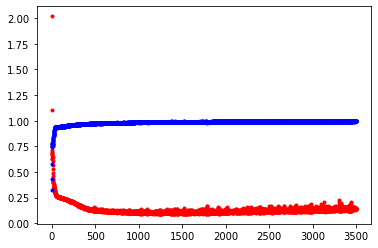

In [12]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

### 모델 학습 자동중단

In [15]:
from keras.callbacks import EarlyStopping
import glob

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

del checkpointer
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

files = glob.glob(''.join([MODEL_DIR, "*"]))
for f in files:
    os.remove(f)

del model

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.38145, saving model to ./model/01-0.3815.hdf5

Epoch 00002: val_loss improved from 0.38145 to 0.36604, saving model to ./model/02-0.3660.hdf5

Epoch 00003: val_loss did not improve from 0.36604

Epoch 00004: val_loss did not improve from 0.36604

Epoch 00005: val_loss did not improve from 0.36604

Epoch 00006: val_loss improved from 0.36604 to 0.35353, saving model to ./model/06-0.3535.hdf5

Epoch 00007: val_loss improved from 0.35353 to 0.33802, saving model to ./model/07-0.3380.hdf5

Epoch 00008: val_loss improved from 0.33802 to 0.32787, saving model to ./model/08-0.3279.hdf5

Epoch 00009: val_loss improved from 0.32787 to 0.32499, saving model to ./model/09-0.3250.hdf5

Epoch 00010: val_loss improved from 0.32499 to 0.32420, saving model to ./model/10-0.3242.hdf5

Epoch 00011: val_loss improved from 0.32420 to 0.31804, saving model to ./model/11-0.3180.hdf5

Epoch 00012: val_loss improved from 0.31804 to 0.30628, saving model to ./model


Epoch 00092: val_loss improved from 0.15871 to 0.15759, saving model to ./model/92-0.1576.hdf5

Epoch 00093: val_loss improved from 0.15759 to 0.15744, saving model to ./model/93-0.1574.hdf5

Epoch 00094: val_loss improved from 0.15744 to 0.15585, saving model to ./model/94-0.1559.hdf5

Epoch 00095: val_loss improved from 0.15585 to 0.15449, saving model to ./model/95-0.1545.hdf5

Epoch 00096: val_loss improved from 0.15449 to 0.15367, saving model to ./model/96-0.1537.hdf5

Epoch 00097: val_loss improved from 0.15367 to 0.15275, saving model to ./model/97-0.1528.hdf5

Epoch 00098: val_loss improved from 0.15275 to 0.15216, saving model to ./model/98-0.1522.hdf5

Epoch 00099: val_loss improved from 0.15216 to 0.15115, saving model to ./model/99-0.1512.hdf5

Epoch 00100: val_loss improved from 0.15115 to 0.15015, saving model to ./model/100-0.1501.hdf5

Epoch 00101: val_loss improved from 0.15015 to 0.14959, saving model to ./model/101-0.1496.hdf5

Epoch 00102: val_loss improved from 0


Epoch 00192: val_loss did not improve from 0.09416

Epoch 00193: val_loss improved from 0.09416 to 0.09353, saving model to ./model/193-0.0935.hdf5

Epoch 00194: val_loss improved from 0.09353 to 0.09257, saving model to ./model/194-0.0926.hdf5

Epoch 00195: val_loss improved from 0.09257 to 0.09189, saving model to ./model/195-0.0919.hdf5

Epoch 00196: val_loss improved from 0.09189 to 0.09132, saving model to ./model/196-0.0913.hdf5

Epoch 00197: val_loss did not improve from 0.09132

Epoch 00198: val_loss improved from 0.09132 to 0.09052, saving model to ./model/198-0.0905.hdf5

Epoch 00199: val_loss did not improve from 0.09052

Epoch 00200: val_loss improved from 0.09052 to 0.09025, saving model to ./model/200-0.0902.hdf5

Epoch 00201: val_loss did not improve from 0.09025

Epoch 00202: val_loss improved from 0.09025 to 0.08954, saving model to ./model/202-0.0895.hdf5

Epoch 00203: val_loss improved from 0.08954 to 0.08917, saving model to ./model/203-0.0892.hdf5

Epoch 00204: va


Epoch 00304: val_loss did not improve from 0.06988

Epoch 00305: val_loss did not improve from 0.06988

Epoch 00306: val_loss did not improve from 0.06988

Epoch 00307: val_loss improved from 0.06988 to 0.06987, saving model to ./model/307-0.0699.hdf5

Epoch 00308: val_loss did not improve from 0.06987

Epoch 00309: val_loss improved from 0.06987 to 0.06941, saving model to ./model/309-0.0694.hdf5

Epoch 00310: val_loss did not improve from 0.06941

Epoch 00311: val_loss improved from 0.06941 to 0.06920, saving model to ./model/311-0.0692.hdf5

Epoch 00312: val_loss did not improve from 0.06920

Epoch 00313: val_loss did not improve from 0.06920

Epoch 00314: val_loss did not improve from 0.06920

Epoch 00315: val_loss improved from 0.06920 to 0.06914, saving model to ./model/315-0.0691.hdf5

Epoch 00316: val_loss did not improve from 0.06914

Epoch 00317: val_loss improved from 0.06914 to 0.06903, saving model to ./model/317-0.0690.hdf5

Epoch 00318: val_loss did not improve from 0.0


Epoch 00429: val_loss did not improve from 0.05984

Epoch 00430: val_loss did not improve from 0.05984

Epoch 00431: val_loss improved from 0.05984 to 0.05979, saving model to ./model/431-0.0598.hdf5

Epoch 00432: val_loss did not improve from 0.05979

Epoch 00433: val_loss did not improve from 0.05979

Epoch 00434: val_loss did not improve from 0.05979

Epoch 00435: val_loss improved from 0.05979 to 0.05961, saving model to ./model/435-0.0596.hdf5

Epoch 00436: val_loss improved from 0.05961 to 0.05920, saving model to ./model/436-0.0592.hdf5

Epoch 00437: val_loss did not improve from 0.05920

Epoch 00438: val_loss did not improve from 0.05920

Epoch 00439: val_loss did not improve from 0.05920

Epoch 00440: val_loss did not improve from 0.05920

Epoch 00441: val_loss did not improve from 0.05920

Epoch 00442: val_loss did not improve from 0.05920

Epoch 00443: val_loss did not improve from 0.05920

Epoch 00444: val_loss improved from 0.05920 to 0.05896, saving model to ./model/444-


Epoch 00573: val_loss did not improve from 0.05471

Epoch 00574: val_loss did not improve from 0.05471

Epoch 00575: val_loss did not improve from 0.05471

Epoch 00576: val_loss did not improve from 0.05471

Epoch 00577: val_loss did not improve from 0.05471

Epoch 00578: val_loss did not improve from 0.05471

Epoch 00579: val_loss did not improve from 0.05471

Epoch 00580: val_loss did not improve from 0.05471

Epoch 00581: val_loss did not improve from 0.05471

Epoch 00582: val_loss did not improve from 0.05471

Epoch 00583: val_loss did not improve from 0.05471

Epoch 00584: val_loss did not improve from 0.05471

Epoch 00585: val_loss did not improve from 0.05471

Epoch 00586: val_loss did not improve from 0.05471

Epoch 00587: val_loss did not improve from 0.05471

Epoch 00588: val_loss did not improve from 0.05471

Epoch 00589: val_loss did not improve from 0.05471

Epoch 00590: val_loss improved from 0.05471 to 0.05460, saving model to ./model/590-0.0546.hdf5

Epoch 00591: val_l


Epoch 00738: val_loss did not improve from 0.05302

Epoch 00739: val_loss did not improve from 0.05302

Epoch 00740: val_loss did not improve from 0.05302

Epoch 00741: val_loss did not improve from 0.05302

Epoch 00742: val_loss did not improve from 0.05302

Epoch 00743: val_loss did not improve from 0.05302

Epoch 00744: val_loss did not improve from 0.05302

Epoch 00745: val_loss did not improve from 0.05302

Epoch 00746: val_loss did not improve from 0.05302

Epoch 00747: val_loss did not improve from 0.05302

Epoch 00748: val_loss did not improve from 0.05302

Epoch 00749: val_loss did not improve from 0.05302

Epoch 00750: val_loss did not improve from 0.05302

Epoch 00751: val_loss did not improve from 0.05302


In [16]:
print("Accuracy: {}".format(model.evaluate(X, Y)[1]))

975/975 [==============================] - 0s 28us/step
Accuracy: 0.9856410026550293
